## Python in Excel

V programih v Python lahko brez večje drame (ali celo tragedije) beremo (in pišemo) podatke iz datotek (in v datoteke) v Excelu. Potrebujemo le primerno knjižnico. Za .xlsx je to `openpyxl`, za starejši `.xls` pa `xlrd`. Tu se bomo ukvarjali le s prvo. V drugi je podobno.

Openpyxl je potrebno najprej namestiti. Dril poznamo: `pip install openpyxl`.

Nato uvozimo knjižnico in naložimo zvezek (*workbook*) iz datoteke.

In [7]:
import openpyxl

wb = openpyxl.load_workbook("xml/primer.xlsx")

wb

`wb` zdaj predstavlja celoten zvezek. Ta je sestavljen iz listov. Njihova imena izvemo v `sheetnames`.

In [4]:
wb.sheetnames

['Sheet1', 'Sheet2']

`wb` se obnaša tudi kot nekakšen slovar; imena zvezkov so ključi, pripadajoče vrednosti pa so, očitno, zvezki.

In [8]:
ws = wb["Sheet1"]

ws

<Worksheet "Sheet1">

Vse se torej dogaja po nivojih - imamo podatkovni tip, ki predstavlja zvezek, tip, ki predstavlja list in, na koncu, tip, ki predstavlja celico. Do objektov tega tipa pridemo s funkcijo `cells`, ki jih podamo "koordinate" celice.

In [12]:
cell = ws.cell(4, 1)

cell

<Cell 'Sheet1'.A4>

Ne spreglejmo, da `openpyxl` šteje celice od 1, ne od 0, kot smo vajeni v Pythonu. Celica (4, 1) ni B5, temveč A4. To je morda nekoliko nerodno, a štetje od 0 bi bilo najbrž še nerodnejše. In, da, v koordinatah najprej povemo vrstico in nato stolpec, medtem ko je v Excelovi notaciji (A4), ravno obratno.

Celice imajo kup stvari. Očitno nas bo navadno zanimala vrednost.

In [13]:
cell.value

'Cilka'

Tabela je takšna

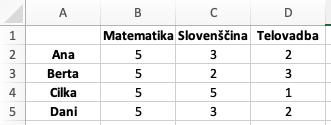

Torej je v A4 res Cilka.

"Kup stvari" v `cell` pač pomeni vse lastnosti, ki jih lahko v Excelu damo celici. Vse so nam dostopne. Recimo

In [14]:
cell.alignment

<openpyxl.styles.alignment.Alignment object>
Parameters:
horizontal='center', vertical=None, textRotation=0, wrapText=None, shrinkToFit=None, indent=0.0, relativeIndent=0.0, justifyLastLine=None, readingOrder=0.0

In [15]:
cell.font

<openpyxl.styles.fonts.Font object>
Parameters:
name='Calibri', charset=None, family=2.0, b=True, i=False, strike=None, outline=None, shadow=None, condense=None, color=<openpyxl.styles.colors.Color object>
Parameters:
rgb=None, indexed=None, auto=None, theme=1, tint=0.0, type='theme', extend=None, sz=12.0, u=None, vertAlign=None, scheme='minor'

S takimi stvarmi, kot je programsko branje poravnave, pisav in bogvečesa še, se bržkone ne bomo ukvarjali. Če bi ravno morali pa - da, `cell.font` vrne nek podatek tipa `Font` (točneje, podatek tip `openpyxl.styles.fonts.Font`) in znotraj tega objekta so vsi podatki o pisavi, na primer oblika pisave,

In [16]:
cell.font.name

'Calibri'

in ali je celica zapisana v odebeljenem

In [17]:
cell.font.b

True

(je) ali v poševnem tisku

In [18]:
cell.font.i

False

(ni).

Bolj nas bodo torej zanimale vrednosti. Do njih lahko, kot rečeno, pridemo s `cells`, najpogosteje pa si bomo želeli preprosto vse vrednosti v tabeli. Za to nam pride prav nekaj generatorjev.

`ws.rows` generira vrstice.

In [20]:
ws.rows

<generator object Worksheet._cells_by_row at 0x1174f95a0>

Delati ga naženemo z zanko `for`, pa vidimo, da za vsako vrstico vrne seznam celic.

In [22]:
for vrstica in ws.rows:
    print(vrstica)

(<Cell 'Sheet1'.A1>, <Cell 'Sheet1'.B1>, <Cell 'Sheet1'.C1>, <Cell 'Sheet1'.D1>)
(<Cell 'Sheet1'.A2>, <Cell 'Sheet1'.B2>, <Cell 'Sheet1'.C2>, <Cell 'Sheet1'.D2>)
(<Cell 'Sheet1'.A3>, <Cell 'Sheet1'.B3>, <Cell 'Sheet1'.C3>, <Cell 'Sheet1'.D3>)
(<Cell 'Sheet1'.A4>, <Cell 'Sheet1'.B4>, <Cell 'Sheet1'.C4>, <Cell 'Sheet1'.D4>)
(<Cell 'Sheet1'.A5>, <Cell 'Sheet1'.B5>, <Cell 'Sheet1'.C5>, <Cell 'Sheet1'.D5>)


Kar bi radi vrednosti, seveda potrebujemo še eno zanko,

In [23]:
for vrstica in ws.rows:
    for celica in vrstica:
        print(celica.value)
    print()

None
Matematika
Slovenščina
Telovadba

Ana
5
3
2

Berta
5
2
3

Cilka
5
5
1

Dani
5
3
2



Ali pa, bolj praktično, uporabimo izpeljane sezname in brez hujših muk dobimo celo tabelico v seznamu seznamov.

In [24]:
[[celica.value for celica in vrstica] for vrstica in ws.rows]

[[None, 'Matematika', 'Slovenščina', 'Telovadba'],
 ['Ana', 5, 3, 2],
 ['Berta', 5, 2, 3],
 ['Cilka', 5, 5, 1],
 ['Dani', 5, 3, 2]]

Mimogrede opazimo, da `openpyxl` ne vrača nizov, temveč so besedilna polja nizi, številska pa številke. (Prazne celice pa `None`). To si lahko privošči, ker že Excel ve - in v .xlsx zapiše - kakšnega tipa je posamična celica. Openpyxl zgolj uboga.

Zgodilo se bo, da nas bodo namesto vrstic zanimali stolpci. Ista reč, le `columns` namesto `rows`.

In [25]:
[[celica.value for celica in vrstica] for vrstica in ws.columns]

[[None, 'Ana', 'Berta', 'Cilka', 'Dani'],
 ['Matematika', 5, 5, 5, 5],
 ['Slovenščina', 3, 2, 5, 3],
 ['Telovadba', 2, 3, 1, 2]]

Lahko pa uporabimo, preprosto, `values`.

In [26]:
ws.values

<generator object Worksheet.values at 0x1113cc5f0>

Ta je sicer spet generator, vendar generira vrstice vrednosti, zato ga lahko izgeneriramo kar z `list`.

In [27]:
list(ws.values)

[(None, 'Matematika', 'Slovenščina', 'Telovadba'),
 ('Ana', 5, 3, 2),
 ('Berta', 5, 2, 3),
 ('Cilka', 5, 5, 1),
 ('Dani', 5, 3, 2)]

Tule je potrebno popaziti: Excel včasih ne ve, kje se konča tabela, zato v .xlsx zapiše napačen podatek. Tule bi nam lahko mirno dodal vrstico in sestavil

```
[(None, 'Matematika', 'Slovenščina', 'Telovadba'),
 ('Ana', 5, 3, 2),
 ('Berta', 5, 2, 3),
 ('Cilka', 5, 5, 1),
 ('Dani', 5, 3, 2),
 (None, None, None, None)]
 ```
 
ali pa bi ga pičilo dodati še deset praznih stolpcev. Tudi informacija o prvem in zadnjem zasedenem stolpcu in vrstici je lahko pravilna ali pa tudi ne.

In [28]:
ws.min_row, ws.max_row

(1, 5)

In [29]:
ws.min_column, ws.max_column

(1, 4)

Problem je že dolgo znan in obvoza ni. Edino, kar lahko storimo, je, da program po branju preveri in sam odreže vse vrstice in stolpce na koncu, ki ne vsebujejo drugega kot `None`.